In [1]:
import os
import sys
sys.path.append('utils')
from dataset.spot import DailyDataset, PeriodDataset, get_loader, TOTAL_STD, TOTAL_MEAN
from tool import to_gpu
import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt

import types

%matplotlib inline

In [2]:
# from drnn import ResDRNN as Model
# from gated_model import ResRNN as Model
from fsrnn import FS_RNN as Model

In [4]:
dataset = DailyDataset(N=2000, W=14)
# dataset = PeriodDataset(N=2000, W=14, P=7)
loader = get_loader(dataset, batch_size=64, shuffle=True, num_workers=2)

Data build range: [window(2010-06-27 00:00:00) - 2010-07-11 00:00:00, 2015-12-31 00:00:00]


In [5]:
trainX, trainY = dataset.get_io('2012-01-01', '2015-12-31')
testX, testY = dataset.get_io('2012-01-01', '2016-08-30')
with torch.no_grad():
    test_period_input = to_gpu(testX)
    self_test_input = to_gpu(testX[:trainX.size()[0] + 1])

In [6]:
self_test_input.shape

torch.Size([1475, 24])

In [7]:
trainX.shape

torch.Size([1474, 24])

In [22]:
PATH = './runs/fs/'
run = 'fsrnn_2'
# PATH = './runs/p7/'
# run = 'resrnn_test'
# model = to_gpu(Model(n_input=14*24,n_hidden=128,n_layers=4,n_output=24))
# model = to_gpu(Model(n_input=14*24,n_hidden=256,dilation=[1,4,7,1],n_output=24, cell_type='GRU'))
# model = to_gpu(Model(input_dim=168, output_dim=24, hidden_size=128, hard_gate=1))

model = to_gpu(Model(n_input=24, n_hidden=64, n_output=24, cell_type='GRU', k=4,))
model.load_state_dict(torch.load(os.path.join(PATH, run, 'snapshots14.pth')))

Sequential(
  (0): GRU(24, 64)
  (1): GRU(64, 64)
  (2): GRU(64, 64)
  (3): GRU(64, 64)
)


In [23]:
test_period_output= model.forecast(test_period_input)
# self_test_output = model.self_forecast(self_test_input, 243)

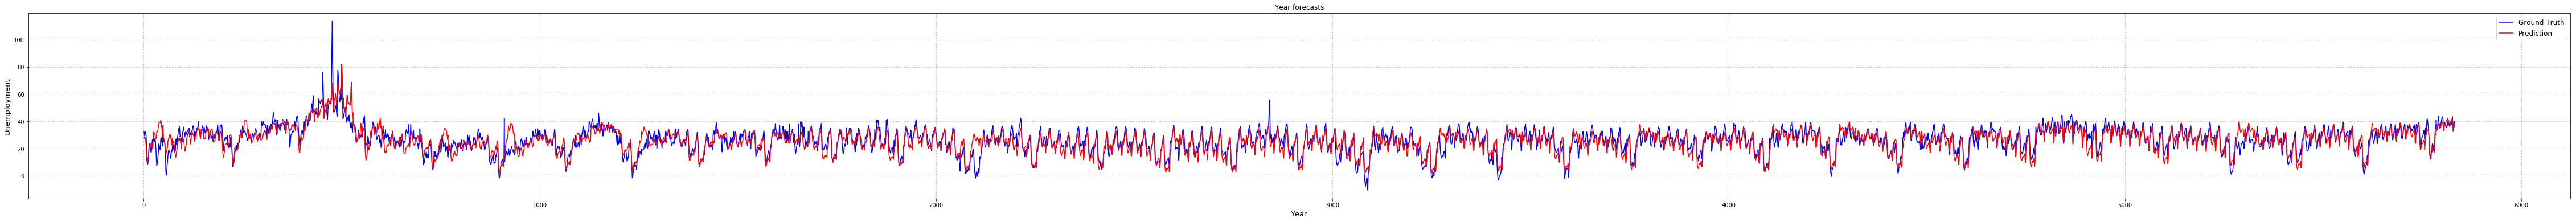

In [24]:
y_pred = torch.reshape(test_period_output[0].cpu(),(1717*24,)).detach().numpy() * TOTAL_STD + TOTAL_MEAN
y = torch.reshape(testY,(1717*24,)).numpy() * TOTAL_STD + TOTAL_MEAN
x=np.linspace(1, 243*24, 243*24)
plt.figure(figsize=(80,6))
plt.plot(x, y[-243*24:], color='blue', label='Ground Truth')
plt.plot(x, y_pred[-243*24:], color='red', label='Prediction')

# plt.xticks(x)
# plt.xlim(0,23)
plt.legend(fontsize='large') # 显示图例

plt.title('Year forecasts')
plt.xlabel('Year',fontsize=13)
plt.ylabel('Unemployment',fontsize=13)

plt.grid(linestyle=':', linewidth=1)
# plt.savefig('./figures/Hour.jpg',bbox_inches='tight', dpi=400)

plt.show()

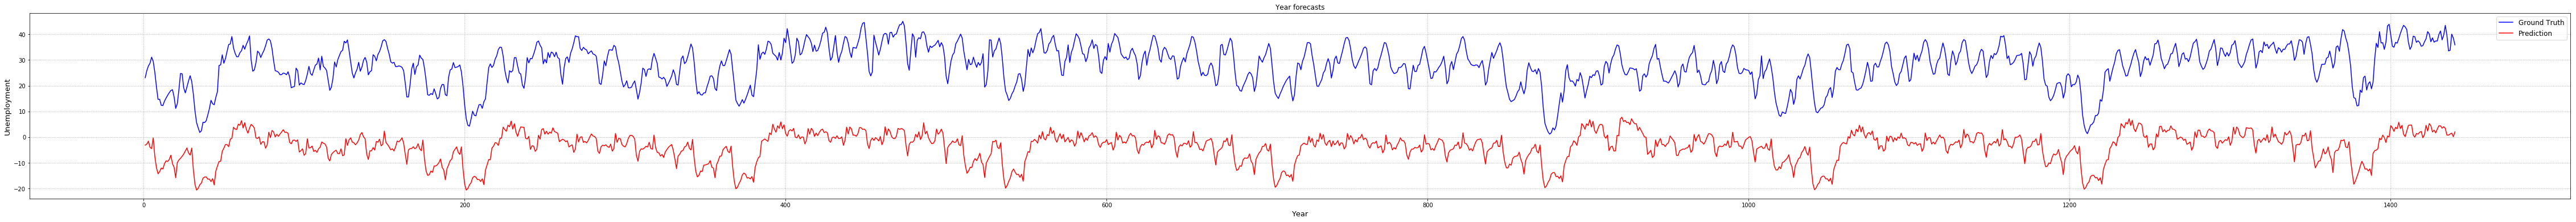

In [28]:
y_pred = torch.reshape(test_period_output[1].cpu(),(1717*24,)).detach().numpy()* TOTAL_STD
y = torch.reshape(testY,(1717*24,)).numpy()* TOTAL_STD + TOTAL_MEAN
plt.figure(figsize=(80,6))
# x=np.linspace(1, 243*24, 243*24)
# plt.plot(x, y[-243*24:], color='blue', label='Ground Truth')
# plt.plot(x, y_pred[-243*24:], color='red', label='Prediction')
x=np.linspace(1, 60*24, 60*24)
plt.plot(x, y[-60*24:], color='blue', label='Ground Truth')
plt.plot(x, y_pred[-60*24:], color='red', label='Prediction')

# plt.xticks(x)
# plt.xlim(0,23)
plt.legend(fontsize='large') # 显示图例

plt.title('Year forecasts')
plt.xlabel('Year',fontsize=13)
plt.ylabel('Unemployment',fontsize=13)

plt.grid(linestyle=':', linewidth=1)
# plt.savefig('./figures/Hour.jpg',bbox_inches='tight', dpi=400)

plt.show()

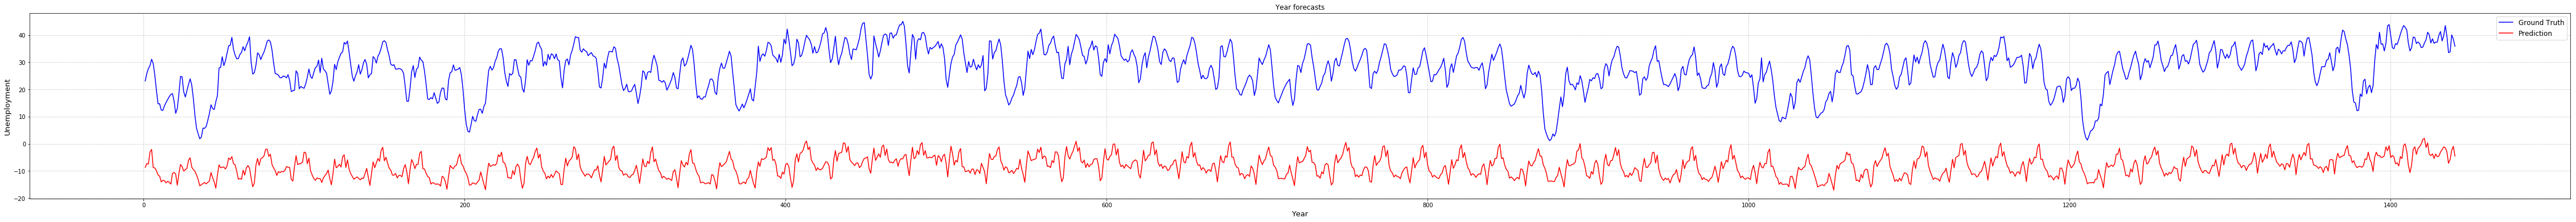

In [27]:
y_pred = torch.reshape(test_period_output[2].cpu(),(1717*24,)).detach().numpy()* TOTAL_STD# + TOTAL_MEAN
y = torch.reshape(testY,(1717*24,)).numpy()* TOTAL_STD + TOTAL_MEAN
plt.figure(figsize=(80,6))
# x=np.linspace(1, 243*24, 243*24)
# plt.plot(x, y[-243*24:], color='blue', label='Ground Truth')
# plt.plot(x, y_pred[-243*24:], color='red', label='Prediction')
x=np.linspace(1, 60*24, 60*24)
plt.plot(x, y[-60*24:], color='blue', label='Ground Truth')
plt.plot(x, y_pred[-60*24:], color='red', label='Prediction')

# plt.xticks(x)
# plt.xlim(0,23)
plt.legend(fontsize='large') # 显示图例

plt.title('Year forecasts')
plt.xlabel('Year',fontsize=13)
plt.ylabel('Unemployment',fontsize=13)

plt.grid(linestyle=':', linewidth=1)
# plt.savefig('./figures/Hour.jpg',bbox_inches='tight', dpi=400)

plt.show()

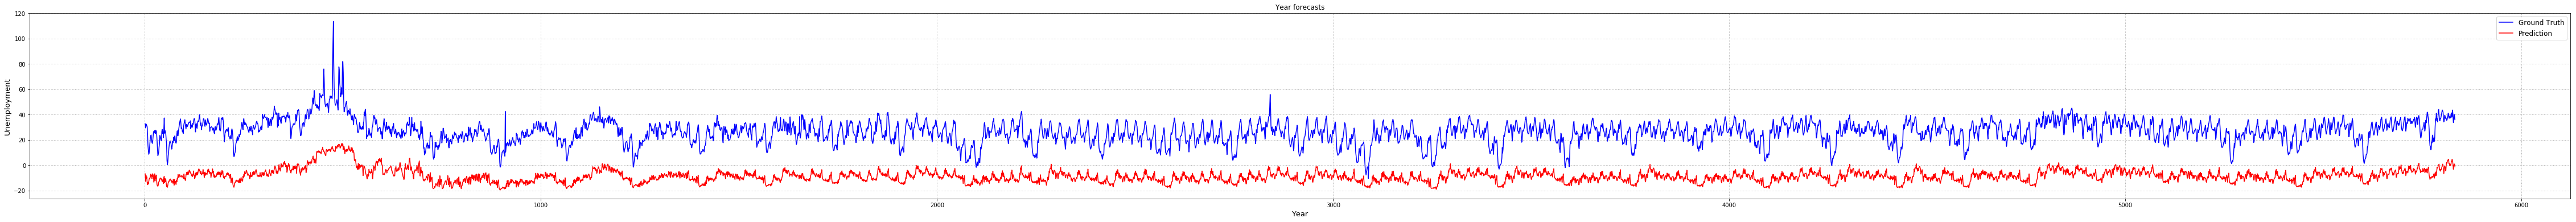

In [10]:
y_pred = torch.reshape(test_period_output[3].cpu(),(1704*24,)).detach().numpy()* TOTAL_STD
y = torch.reshape(testY,(1704*24,)).numpy()* TOTAL_STD + TOTAL_MEAN
plt.figure(figsize=(80,6))
x=np.linspace(1, 243*24, 243*24)
plt.plot(x, y[-243*24:], color='blue', label='Ground Truth')
plt.plot(x, y_pred[-243*24:], color='red', label='Prediction')
# x=np.linspace(1, 60*24, 60*24)
# plt.plot(x, y[-60*24:], color='blue', label='Ground Truth')
# plt.plot(x, y_pred[-60*24:], color='red', label='Prediction')

# plt.xticks(x)
# plt.xlim(0,23)
plt.legend(fontsize='large') # 显示图例

plt.title('Year forecasts')
plt.xlabel('Year',fontsize=13)
plt.ylabel('Unemployment',fontsize=13)

plt.grid(linestyle=':', linewidth=1)
# plt.savefig('./figures/Hour.jpg',bbox_inches='tight', dpi=400)

plt.show()

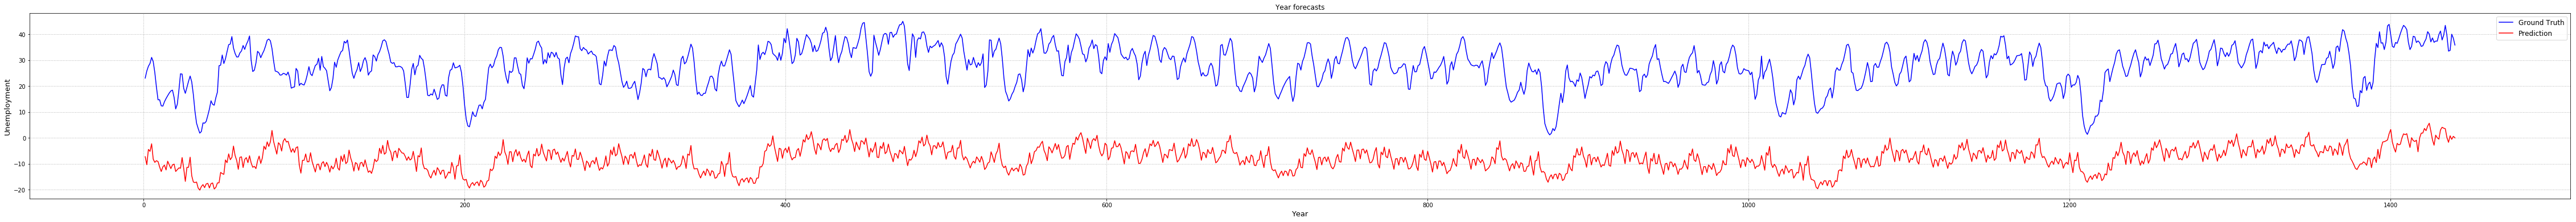

In [11]:
y_pred = torch.reshape(test_period_output[2].cpu()+test_period_output[3].cpu(),(1704*24,)).detach().numpy()* TOTAL_STD
y = torch.reshape(testY,(1704*24,)).numpy()* TOTAL_STD + TOTAL_MEAN
plt.figure(figsize=(80,6))
# x=np.linspace(1, 243*24, 243*24)
# plt.plot(x, y[-243*24:], color='blue', label='Ground Truth')
# plt.plot(x, y_pred[-243*24:], color='red', label='Prediction')
x=np.linspace(1, 60*24, 60*24)
plt.plot(x, y[-60*24:], color='blue', label='Ground Truth')
plt.plot(x, y_pred[-60*24:], color='red', label='Prediction')

# plt.xticks(x)
# plt.xlim(0,23)
plt.legend(fontsize='large') # 显示图例

plt.title('Year forecasts')
plt.xlabel('Year',fontsize=13)
plt.ylabel('Unemployment',fontsize=13)

plt.grid(linestyle=':', linewidth=1)
# plt.savefig('./figures/Hour.jpg',bbox_inches='tight', dpi=400)

plt.show()

In [12]:
y_pred = torch.reshape(self_test_output.cpu(),(1717*24,)).detach().numpy()* TOTAL_STD + TOTAL_MEAN
y = torch.reshape(testY,(1717*24,)).numpy()* TOTAL_STD + TOTAL_MEAN
x=np.linspace(1, 243*24, 243*24)
plt.figure(figsize=(80,6))
plt.plot(x, y[-243*24:], color='blue', label='Ground Truth')
plt.plot(x, y_pred[-243*24:], color='red', label='Prediction')

# plt.xticks(x)
# plt.xlim(0,23)
plt.legend(fontsize='large') # 显示图例

plt.title('Rolling forecasts')
plt.xlabel('Year',fontsize=13)
plt.ylabel('Price',fontsize=13)

plt.grid(linestyle=':', linewidth=1)
# plt.savefig('./figures/Hour.jpg',bbox_inches='tight', dpi=400)

plt.show()

NameError: name 'self_test_output' is not defined